In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variation of energy upon switching the direction of a spin at position 'i'. 
# 'grid' is the lattice containing the spins
# 'J' is the coupling energy between spins
def VarHamiltonian(J,grid,i):
    sx = grid.size
    energy = 2*J*grid[i]*(grid[(i+1)%sx]+grid[(i-1)%sx])
    return energy

# Total magnetization of the lattice obtained by summing the spins altogether
# 'grid' is the lattice containing the spins
def Magnetization(grid):
    return grid.sum();

# Energy of the lattice for a given configuration
# 'grid' is the lattice containing the spins
# 'J' is the coupling energy between spins
def Energy(J,grid):
    sx = grid.size
    energy = 0;
    for i in range(0,sx):
        energy -= J*grid[i]*(grid[(i+1)%sx]+grid[(i-1)%sx])
    return energy  

# Modification of the lattice following the (Monte-Carlo) Metropolis algorithm
# 'grid' is the lattice containing the spins
# 'J' is the coupling energy between spins
# 'beta' is the inverse thermal energy
def MonteCarloStep(grid,J,beta):
    i = np.random.randint(nx)
    deltaEnergy = VarHamiltonian(1,grid,i)
            
    if (deltaEnergy <= 0):
        grid[i] *= -1
            
    elif (np.exp(-beta*deltaEnergy) > np.random.rand()):
        grid[i] *= -1

    return grid

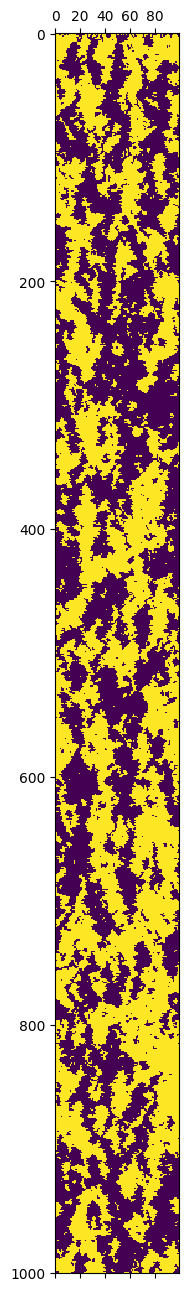

In [3]:
# ---------------------------------------------------------------------------
# --------------------------------- MAIN ------------------------------------
# ---------------------------------------------------------------------------

# Definition of key variables -----------------------------------------------

nx = 100; # size of the lattice (1D)
beta = 1.; # inverse thermal energy for Montecarlo step
tMax = nx*1000; # duration of the simulation (proportional to the lattice size)

# Definition of the lattice and associated memory ---------------------------

lattice = np.random.choice([-1,1], size=nx) # initialize the lattice with randomly selected spins (uniform distribution)
latticeTimeEvolution = np.array([lattice]) # store the lattice state at periodic time intervals
magn = np.array([Magnetization(lattice)]) # store the lattice magnetization at each step
en = np.array([Energy(1,lattice)]) # store the lattice energy at each step

# Time propagation ----------------------------------------------------------

for t in range(0,tMax):
    
    i = np.random.randint(nx) # select a random position to possibly flip the spin
    
    deltaEnergy = VarHamiltonian(1,lattice,i) # check energy variation upon spin flip
            
    # if the energy is decreased, accept the change    
    if (deltaEnergy <= 0):
        lattice[i] *= -1
        magn = np.append(magn,magn[-1]+2*lattice[i])
        en = np.append(en,en[-1]+deltaEnergy)
            
    # if the energy is increased, accept the change with probability exp(-beta*dU)
    elif (np.exp(-beta*deltaEnergy) > np.random.rand()):
        lattice[i] *= -1
        magn = np.append(magn,magn[-1]+2*lattice[i])
        en = np.append(en,en[-1]+deltaEnergy)
    
    # if energy is not changed, to nothing
    else:
        magn = np.append(magn,magn[-1])
        en = np.append(en,en[-1])
    
    # store the lattice into the memory at periodic time interval (period = nx)        
    if (t%nx == 0):
        latticeTimeEvolution = np.append(latticeTimeEvolution, [lattice],0)

# Visualization  ----------------------------------------------------------      
plt.matshow(latticeTimeEvolution) # kymograph of the lattice evolution (x = lattice, y = time)  
plt.show() 

-8.55909440905591

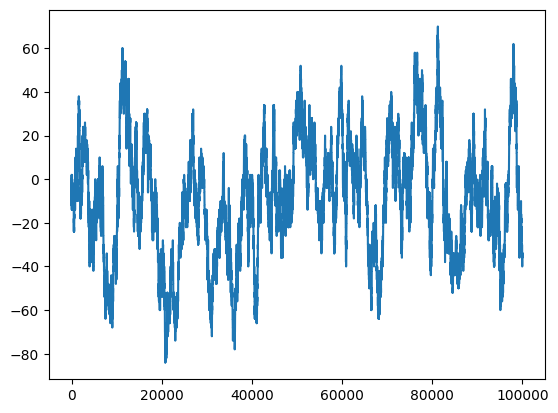

In [77]:
# Visualisation of magnetization and associated time-averaged value
plt.plot(magn)
np.mean(magn)

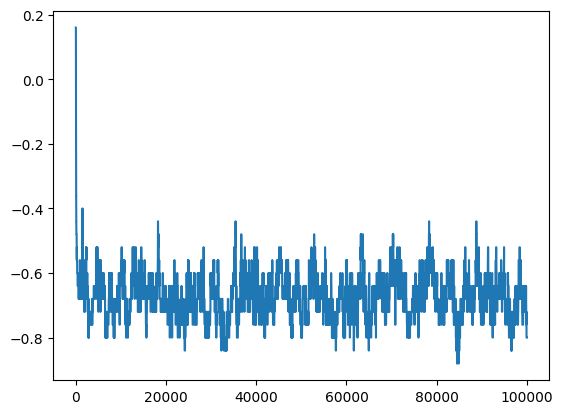

In [78]:
# Visualisation of rescaled lattice energy (per spin)
plt.plot(en/nx)